# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_safari, load_cifar10



Using TensorFlow backend.


In [2]:
RUN_ID = '0028'
RUN_FOLDER = os.path.join("./run", RUN_ID)

BATCH_SIZE = 64
IMAGE_SIZE = 32

## data

In [3]:
label = 7
(x_train, y_train) = load_cifar10(label)
# (x_train, y_train) = load_safari('elephant')




## architecture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


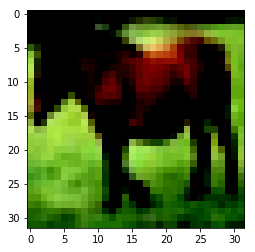

In [4]:
plt.imshow(x_train[0,:,:,:])

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
x_train.shape

(5000, 32, 32, 3)

In [14]:
#works

gan = WGAN(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,64,128,256]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = 0.8
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.00005 #0.0002
        , generator_initial_dense_layer_size = (4, 4, 256)
        , generator_upsample = [2,2,2,1]
        , generator_conv_filters = [128,64, 64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005 #0.0002
        , optimiser = 'rmsprop'
        , z_dim = 100
        )




gan = WGAN(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512] #
        , critic_conv_kernel_size = [5,5,5,5] 
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = 0.8
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (4, 4, 512) #
        , generator_upsample = [2,2,2, 1] #
        , generator_conv_filters = [256,128,64,3] #
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.8 #
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )




gan.save(RUN_FOLDER)




In [15]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [16]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 128)         204928    
_________________________________________________________________
batch_normalization_22 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 256)         819456    
__________

In [17]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_25 (Batc (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 8192)              0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_26 (Batc (None, 8, 8, 256)         1024      
__________

## training

In [18]:
print(gan.model.to_json(indent=4))

{
    "class_name": "Model",
    "config": {
        "name": "model_12",
        "layers": [
            {
                "name": "model_input",
                "class_name": "InputLayer",
                "config": {
                    "batch_input_shape": [
                        null,
                        100
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "name": "model_input"
                },
                "inbound_nodes": []
            },
            {
                "name": "model_11",
                "class_name": "Model",
                "config": {
                    "name": "model_11",
                    "layers": [
                        {
                            "name": "generator_input",
                            "class_name": "InputLayer",
                            "config": {
                                "batch_input_shape": [
                                    null,
      

In [28]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 20000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 5
    , n_critic = 5
    , large_it_critic = 10
    , large_n_critic = 5
    , clip_threshold = 0.01
)

2415 (5, 1) [D loss: (0.061)(R -0.264, F 0.325)]  [G loss: -0.313] 
2416 (5, 1) [D loss: (-0.003)(R -0.321, F 0.318)]  [G loss: -0.316] 
2417 (5, 1) [D loss: (-0.037)(R -0.329, F 0.292)]  [G loss: -0.297] 
2418 (5, 1) [D loss: (0.112)(R -0.281, F 0.393)]  [G loss: -0.345] 
2419 (5, 1) [D loss: (0.018)(R -0.371, F 0.389)]  [G loss: -0.364] 
2420 (5, 1) [D loss: (0.052)(R -0.365, F 0.417)]  [G loss: -0.395] 
2421 (5, 1) [D loss: (0.025)(R -0.412, F 0.437)]  [G loss: -0.415] 
2422 (5, 1) [D loss: (0.022)(R -0.413, F 0.435)]  [G loss: -0.397] 
2423 (5, 1) [D loss: (0.035)(R -0.407, F 0.442)]  [G loss: -0.402] 
2424 (5, 1) [D loss: (0.012)(R -0.406, F 0.418)]  [G loss: -0.379] 
2425 (5, 1) [D loss: (0.006)(R -0.402, F 0.408)]  [G loss: -0.364] 
2426 (5, 1) [D loss: (-0.009)(R -0.386, F 0.377)]  [G loss: -0.309] 
2427 (5, 1) [D loss: (-0.031)(R -0.348, F 0.317)]  [G loss: -0.248] 
2428 (5, 1) [D loss: (-0.116)(R -0.315, F 0.199)]  [G loss: -0.180] 
2429 (5, 1) [D loss: (-0.099)(R -0.267, F 0

KeyboardInterrupt: 

In [ ]:
gan.epoch = 25

In [ ]:
# Check weights updating

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])
print('--- TRAIN CRITIC ---')
noise = np.random.normal(0, 1, (BATCH_SIZE, 100))
gen_imgs = gan.generator.predict(noise)
gan.train_critic(x_train, batch_size = BATCH_SIZE, using_generator = False, clip_threshold = 0.01)

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])
print('--- TRAIN GENERATOR ---')
gan.train_generator(batch_size = BATCH_SIZE)

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])

In [25]:
check = True
while check :

    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
    dummy = np.zeros((BATCH_SIZE, 1), dtype=np.float32) # Dummy gt for gradient penalty
    
    idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
    true_imgs = x_train[idx]

    noise = np.random.normal(0, 1, (BATCH_SIZE, gan.z_dim))
    gen_imgs = gan.generator.predict(noise)

    d_loss_real =   gan.critic.train_on_batch(true_imgs, valid)
    d_loss_fake =   gan.critic.train_on_batch(gen_imgs, fake)
    d_loss = (d_loss_real + d_loss_fake)

    for l in gan.critic.layers:
        weights = l.get_weights()
        weights = [np.clip(w, -0.01, 0.01) for w in weights]
        l.set_weights(weights)

    # Plot the progress
    print ("[D loss: (%.3f)(R %.3f, F %.3f)]" % (d_loss, d_loss_real, d_loss_fake))
    
      
    

[D loss: (-0.077)(R -0.076, F -0.001)]
[D loss: (-0.105)(R -0.074, F -0.031)]
[D loss: (-0.148)(R -0.128, F -0.020)]
[D loss: (-0.064)(R -0.058, F -0.005)]
[D loss: (-0.134)(R -0.081, F -0.054)]
[D loss: (-0.163)(R -0.092, F -0.071)]
[D loss: (-0.198)(R -0.119, F -0.079)]
[D loss: (-0.141)(R -0.121, F -0.020)]
[D loss: (-0.121)(R -0.083, F -0.038)]
[D loss: (-0.169)(R -0.134, F -0.035)]
[D loss: (-0.135)(R -0.114, F -0.021)]
[D loss: (-0.213)(R -0.130, F -0.082)]
[D loss: (-0.195)(R -0.126, F -0.069)]
[D loss: (-0.218)(R -0.150, F -0.068)]
[D loss: (-0.189)(R -0.124, F -0.066)]
[D loss: (-0.219)(R -0.091, F -0.129)]
[D loss: (-0.229)(R -0.123, F -0.107)]
[D loss: (-0.210)(R -0.115, F -0.096)]
[D loss: (-0.264)(R -0.149, F -0.115)]
[D loss: (-0.247)(R -0.137, F -0.110)]
[D loss: (-0.277)(R -0.174, F -0.103)]
[D loss: (-0.265)(R -0.108, F -0.157)]
[D loss: (-0.342)(R -0.188, F -0.154)]
[D loss: (-0.265)(R -0.145, F -0.120)]
[D loss: (-0.180)(R -0.086, F -0.094)]
[D loss: (-0.259)(R -0.15

KeyboardInterrupt: 

In [ ]:
check = True
while check:
    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
    noise = np.random.normal(0, 1, (BATCH_SIZE,100))

    idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
    true_imgs = x_train[idx]
    
#     g_loss = gan.train_generator(batch_size = BATCH_SIZE)
    g_loss = gan.model.train_on_batch(noise, valid)
    # Plot the progress
    print ("[G loss: %.3f]" % (g_loss))
    
    g_loss = gan.model.test_on_batch(noise, valid)
    print ("[G loss: %.3f]" % (g_loss))
    print('-------')
    


In [ ]:
noise = np.random.normal(0, 1, (BATCH_SIZE,100))
img = gan.generator.predict(np.array([noise[0]]))[0]

plt.imshow(np.clip((img+1)*0.5,0,1))

gan.critic.predict(np.array([img]))[0]

In [ ]:
idx = np.random.randint(0, x_train.shape[0], 1)[0]
img = x_train[idx]
print(gan.critic.predict(np.array([img]))[0])
plt.imshow((img + 1) * 0.5)

In [ ]:
valid = np.ones((BATCH_SIZE,1))
noise = np.random.normal(0, 1, (BATCH_SIZE,100))

In [ ]:
print(gan.model.test_on_batch(noise, valid))

In [ ]:
print(gan.model.train_on_batch(noise, valid))

In [ ]:
valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
dummy = np.zeros((BATCH_SIZE, 1), dtype=np.float32) # Dummy gt for gradient penalty

true_imgs = next(x_train)[0]

In [ ]:
print(gan.critic_model.test_on_batch([true_imgs, noise], [valid, fake, dummy]))


In [ ]:
print(gan.critic_model.train_on_batch([true_imgs, noise], [valid, fake, dummy]))

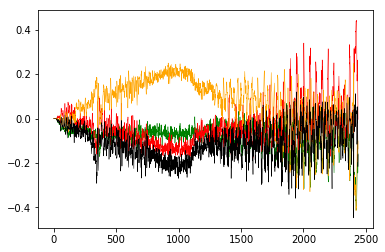

In [29]:
plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5)

plt.plot(gan.g_losses, color='orange', linewidth=0.5)

plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.5)